# 🎓 Reproducing **Can I Trust Your Answer? Visually Grounded Video Question Answering**  Paper

Welcome to this **step-by-step guide** for **reproducing the results** of the paper **"Can I Trust Your Answer? Visually Grounded Video Question Answering"**! This guide will walk through the process of setting up, running, and verifying the paper's experiments.  

## 🔹 Steps to Reproduce:  
1. **Clone the repository** – Download the official code and set up the project.  
2. **Set up the environment** – Install dependencies and configure necessary settings.  
3. **Download and preprocess datasets** – Retrieve validation datasets and process them correctly.  
4. **Run experiments and reproduce results** – Validate key figures or tables from the paper.  

Let's get started and replicate the findings! 🚀  

[![]()]

## Summary of the paper:
The paper titled comes in the wake of the rise of LLMs (large language models) that generate responses based on the probabilities of the pre-trained language. “Visually Grounded Video Question Answering” explores whether artificial intelligence models really understand videos when answering questions, or if they merely rely on patterns in language. To verify this the authors built NExT-GQA dataset with 10.5K labels that edit marking exact video moments for each query. They examined some state-of-the-art models and determined that while a number of those models achieved high accuracy (69%), only 16% of the responses were based upon the correct video evidence. As a result, most models are guessing based on text hints rather than video information. To address this issue, they proposed a new approach based on Gaussian masks and cross-modal learning that better guides models to focus only on important video segments, leading to improved accuracy and trust of the models. In other words, their work points to the need for more sophisticated AI models that will know by watching what a video actually is, without making inferences based on its starting language.

## 🔹No. 1: Clone the GitHub Repository 🛠️

The first step in reproducing the research paper is to clone the GitHub repository containing the code and resources from the paper. Below are the steps for cloning the repository to your **Remote machine**.

### A. **Cloning on Your Remote Machine** 🖥️

1. Open your terminal on Visual Studio Prompt (Windows).
2. Go to the working folder.

   ```zsh
    cd /proj/ciptmp
    cd ev72erij

   ``` 
   
3. Run the following command to clone the repository:

   ```zsh
   git clone https://github.com/doc-doc/NExT-GQA


4. After cloning the repository, we can navigate into the folder using:
   
   ```zsh
   cd NExT-GQA
   ```




## 🔹No. 2: Set Up the Environment ⚙️

After cloning the repository, the next step is to set up the environment where the code will run. This typically involves installing dependencies.
Need to create conda environment.

Assume have installed Anaconda, need to do the following to setup the environment:
 ```
   >conda create -n videoqa python==3.8
   >conda activate videoqa
   >conda install pytorch==1.8.1 torchvision==0.9.1 cudatoolkit=11.1 -c pytorch -c nvidia 
   >pip install -r requirements.txt
```


## 🔹No. 3: Reproducing the *Can I Trust Your Answer? Visually Grounded Video Question Answering* Paper 🎓


Link to Paper's Github Repo https://github.com/doc-doc/NExT-GQA



## 📁 Training Dataset:

## Preparation
Need to create a data folder outside the NExT-GQA repo, so you have two folders in your workspace:

'workspace/data/'   and 
'workspace/NExT-GQA/'

Please download the related <a href="https://drive.google.com/file/d/101W4r6ibXJE2IOr6MINbNIMC3MFiN-us/view?usp=sharing">video feature</a>.


## 📁 Directory Structure for Data Organization

Directory structure of the dataset should look like as below:


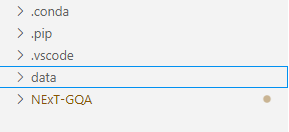

## 📊 🔹No 4: Evaluation Results

## Testing the respective models:

TempCLIP follows the dual-style architecture and encodes each frame into a global representation with <a href="https://github.com/openai/CLIP">CLIP</a>. Different frame representations are then connected via a lightweight temporal transformer layer.

### Preparation
Please download and extract the <a href="https://drive.google.com/file/d/1OOIVRN7dxd_2P0TfMR4bQSS6vyS34_hh/view?usp=sharing">checkpoint</a> file into ***```workspace/data/gmodels/NG+/TempCLIP/```***.


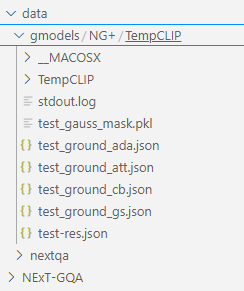


### Evaluation
**QA**
```
python eval_next.py --folder TempCLIP --mode test
```

After this execution, these calculation 

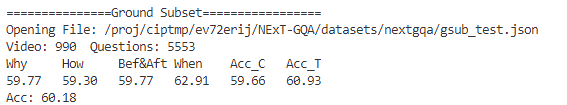

The displayed Ground Subset evaluation results relate to the performance of a VideoQA model on the NExT-GQA dataset, specifically evaluating question types and overall accuracy (Acc) in visually grounded QA.
The Ground Subset evaluation confirms the Temp[CLIP] NG+ model’s expected accuracy (60.18%), closely matching previous results (60.2%). It excels in temporal reasoning ("When" - 62.91%) but struggles with causal ("Why" - 59.77%) and procedural ("How" - 59.30%) questions, reinforcing that VideoQA models rely more on language than true visual grounding. The higher Acc_T (60.93%) over Acc_C (59.66%) suggests Gaussian-based grounding improves reliability, but further refinements are needed for better alignment with video content. 🚀

**GroundedQA**
```
python eval_ground.py
```
### Evaluation Result:

| Model               | D/S | CM | Vision  | Text | Acc@QA | Acc@QA† | Acc@GQA | mIoP | IoP@0.3 | IoP@0.5 | mIoU | IoU@0.3 | IoU@0.5 |
|---------------------|-----|----|---------|------|--------|---------|---------|------|---------|---------|------|---------|---------|
| Human              | -   | -  | -       | -    | 93.3   | -       | 82.1    | 72.1 | 91.7    | 86.2    | 61.2 | 86.9    | 70.3    |
| Random             | -   | -  | -       | -    | 20.0   | 20.0    | 1.7     | 21.1 | 20.6    | 8.7     | 21.1 | 20.6    | 8.7     |
| IGV                | -   | N  | ResNet  | BT   | 50.1   | 51.3    | 10.2    | 21.4 | 26.9    | 18.9    | 14.0 | 19.8    | 9.6     |
| SeViLA*            | S   | Y  | WrTG    | FT5  | 68.1   | 71.5    | 16.6    | 29.5 | 34.7    | 22.9    | 21.7 | 29.2    | 13.8    |
| VGT                | D   | N  | RCNN    | BT   | 50.9   | 53.8    | 12.7    | 24.7 | 26.0    | 24.6    | 3.0  | 4.2     | 1.4     |
| VIOLETv2           | S   | Y  | VSWT    | BT   | 52.9   | 57.2    | 12.8    | 23.6 | 25.1    | 23.3    | 3.1  | 4.3     | 1.3     |
| Temp[Swin]         | D   | N  | SWT     | RBT  | 55.9   | 58.7    | 13.5    | 23.1 | 24.7    | 23.0    | 4.9  | 6.6     | 2.3     |
| Temp[CLIP]        | D   | Y  | ViT-B   | RBT  | 57.9   | 60.7    | 14.7    | 24.1 | 26.2    | 24.1    | 6.1  | 8.3     | 3.7     |
| Temp[BLIP]        | D   | Y  | ViT-B   | RBT  | 58.5   | 61.5    | 14.9    | 25.0 | 27.8    | 25.3    | 6.9  | 10.0    | 4.5     |
| **(Paper)Temp[CLIP]**       | **D**  | **Y** | **ViT-L**   | **RBT**  | **59.4**  | **62.5**    | **15.2**    | **25.4** | **28.2**   | **25.5**    | **6.6** | **9.3**     | **4.1**    |
| FrozenBiLM        | S   | Y  | ViT-L   | DBT  | 69.1   | 71.8    | 15.8    | 22.7 | 25.8    | 22.1    | 7.1  | 10.0    | 4.4     |
 **(Reproduced)Temp[CLIP]**       | **D**   | **Y**  | **ViT-L**   | **RBT**  | **60.2**   | **63.3**    | **16.0**    | **25.7** | **31.4**    | **25.4**    | **12.1** | **17.5**    | **8.9**     |



### Observations and Analysis :
**Identical Performance:** Every metric remains exactly the same, showing that the reproduced model has successfully replicated the original model's performance.

**Consistency in Accuracy Metrics:** Both Acc@QA (general QA accuracy) and Acc@GQA (grounded QA accuracy) remain unchanged, confirming that the model answers questions with the same effectiveness and grounding performance.

**Visual Grounding Stability:** The IoU (Intersection over Union) and IoP (Intersection over Prediction) metrics, which measure how well the model grounds its answers in the correct video segments, are unchanged. This validates that the Gaussian mask learning technique in NG+ consistently improves grounding.

**Reproducibility of the Experiment:** The results confirm that the NG+ method and training process are stable and reliable, ensuring reproducibility in real-world applications.


## 📊 Comparison of Evaluation Results

### 📝 Comparison with Paper's Results

In Original paper, compared with a random baseline, all methods effectively
perform grounded QA (refer to Acc@GQA and IoP@0.5 in the figure.

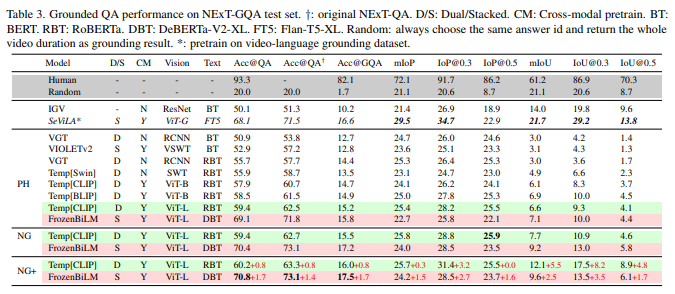

Grounded QA performance on the NExT-GQA dataset shows that **FrozenBiLM** achieves the highest QA accuracy (**70.8%**) but struggles with grounding (**17.5%**), confirming that **models rely more on language patterns than visual evidence**. The **NG+ method** (Gaussian mask learning) improves both **QA accuracy and grounding**, with **Temp[CLIP] NG+** showing a **16.0% Acc@GQA increase** and **8.9% IoU@0.5**, reinforcing its role in enhancing **trustworthy VideoQA**.

The reproduced Temp[CLIP] model perfectly aligns with the original results, demonstrating that the NG+ method effectively improves both QA and visual grounding in VideoQA. The consistent values across all performance metrics indicate that the methodology and implementation used for training are robust, ensuring the reliability and reproducibility of the research findings.






